In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_design_matrix(fns, xs):
    '''
    Given a list of functions (fns) and a vector of features (xs, from x_0 to x_n) generate the design matrix.
    Input: 
        fns: [f : A -> B] of length m
        xs:  features, ndarray of shape (n, )
    Return:
        the design matrix (ndarray) of the shape (n, m)
    '''
    return np.column_stack([fn(xs) for fn in fns])

def fit(fns, alpha, beta, xs, ys):
    '''
    Given a set of basis functions, paired features and labels, estimate the postiror distribution of weights, 
    with zero-means gaussian distribusion as prior. 
    Input: 
        fns: basis functions, [f : A -> B] of length m
        alpha: scalar, precision of the prior distribution w
        beta: scalar, precision of the noise
        xs:  ndarray of shape (n, )
        ys: ndarray of shape (n, )
    Return:
        (m, s): m and s are the mean and standard deviation of weights. 
    '''
    design_matrix = generate_design_matrix(fns, xs)
    #sn: standard deviation of predection
    sn = np.linalg.inv(beta*(design_matrix.T @ design_matrix) + alpha*np.identity(design_matrix.shape[1]))
    #mn: mean of prediction
    mn = beta*np.matmul(np.matmul(sn,design_matrix.T), ys)
    return (mn, sn)
    

def predict(fns, beta, params, xs):
    '''
    Given a set of basis functions, corresponding weights and features, return predicted labels. 
    Input: 
        fns: [f : A -> B] of length m
        beta: scalar, precision of the noise
        params: (w_mean, w_std) where w_mean is the mean of weights and w_std is the standar deviation.
        xs:  ndarray of shape (n, )
    Return:
        predicted labels (ndarray of shape (n, )) and standard deviation of prediction (ndarray of shape (n, ))
    '''
    w_mean, w_std = params
    design_matrix = generate_design_matrix(fns, xs)
    return (design_matrix @ w_mean, np.sqrt((1 / beta) + np.diag(design_matrix @ w_std @ design_matrix.T)))

# A Toy Dataset

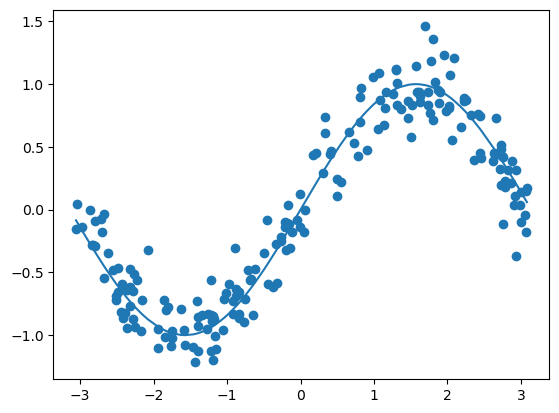

In [3]:
# a toy dataset generated from the sine function
npt = 200
features = (np.random.rand(npt) - 0.5) * 2*np.pi
features = np.sort(features) #for drawing only
labels = np.sin(features) + np.random.normal(scale=0.2, size=features.shape[0])
ground_truth = np.sin(features)

plt.plot(features, ground_truth)
plt.scatter(features, labels)

# Regression W/ the Gaussian Basis function

$\hat{f}(x) = w_0 + w_1\phi_1(x) + w_k\phi_k(x)$ where $\phi_i(x) = e^{-\frac{(x - \mu_i)^2}{2s^2}}$

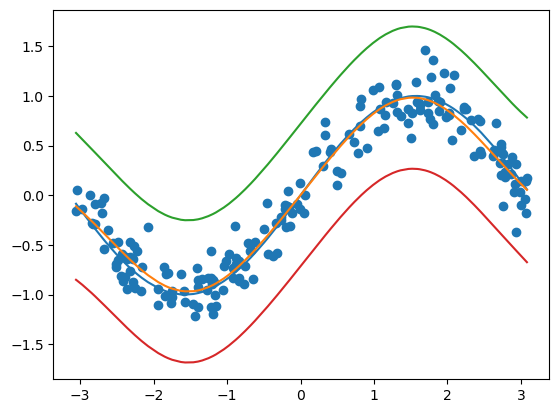

In [9]:
n_component = 9

# alpha: precision of the prior distribution w
alpha=0.5

#beta: precision of the noise
beta=2

def gaussian_basis(mu):
    s = 1
    return lambda x: np.exp(-1 * (x-mu)**2 / (2*s**2))

basis_functions = [gaussian_basis(i) for i in np.linspace(-2*np.pi, 2*np.pi, n_component)]

w = fit(basis_functions, alpha, beta, features, labels)
(pred_mean, pred_std) = predict(basis_functions, beta, w, features)

plt.plot(features, ground_truth)
plt.plot(features, pred_mean)
plt.plot(features, pred_mean + pred_std)
plt.plot(features, pred_mean - pred_std)
plt.scatter(features, labels)